In [56]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using the iris dataset but without the target column to idenitfy the different iris species

In [57]:
data = load_iris(as_frame=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


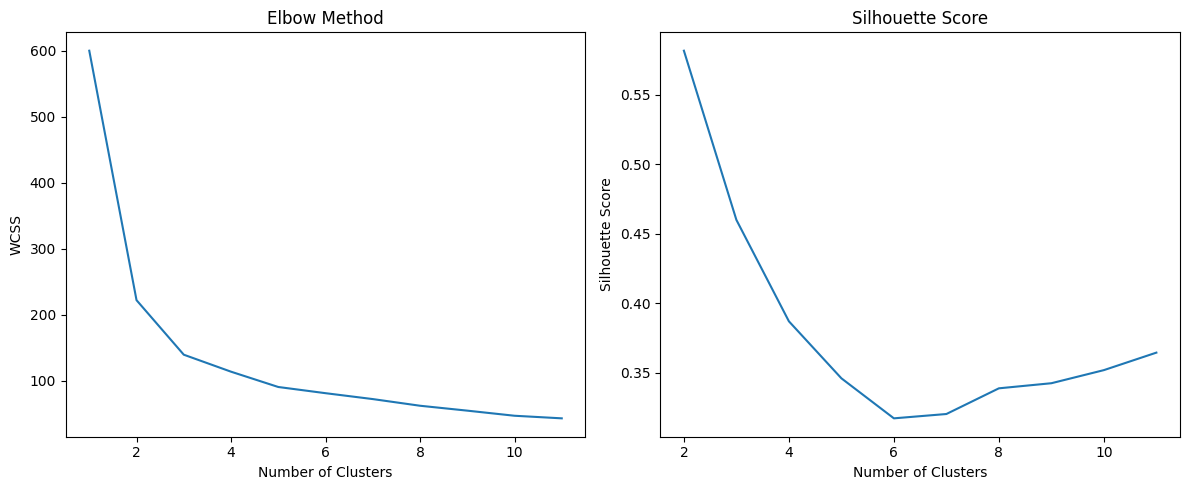

In [58]:
wcss = []
silhouette_scores = []
for i in range(1, 12):
  km = KMeans(n_clusters=i, n_init=10, random_state=42)
  km.fit(X_scaled)
  wcss.append(km.inertia_)
  if i > 1:
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 12), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

The elbow appears at 3 in the graph above

In [59]:
from collections import Counter

km = KMeans(n_clusters=3, n_init=10, random_state=42, init='k-means++')
y_res = km.fit_predict(X_scaled)

print("Labels predicted using KMeans:", Counter(map(int, y_res)))
print("Labels from dataset:", Counter(map(int, data.target)), end="\n\n")

silhouette = silhouette_score(X_scaled, y_res)

print(f"Silhouette Score: {silhouette:.3f}")

Labels predicted using KMeans: Counter({0: 53, 1: 50, 2: 47})
Labels from dataset: Counter({0: 50, 1: 50, 2: 50})

Silhouette Score: 0.460


The silhouette score is a net positive which means that most of the points are assigned to the right clusters